# Unsupervised Learning : R4 - Project1 - Car mpg

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.

<b>Attribute Information: </b>

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Acceleration – continuous

Yr – Model of the car – Multivalued discrete

Mpg - Miles per gallon - continuous

Total points: 30

Steps to follow:

1. Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

## Questions : 

### 1. Launch a new python notebook and read the data set. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [2]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("cars-dataset.csv")  

In [3]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
# get car mpg data set
mpg_df.shape

(398, 8)

In [5]:
#Get information about each column
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
#Looks HorsePower (hp) shows as Object Type in the column info. Which is wrong. 
#There is some invalid char in that column. let's check
mpg_df[mpg_df.hp.str.isdigit() == False]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [7]:
#Looks 'hp' column having ? value which need to convert to numeric type (int or float)
#Replace '?' to NaN in the dataset. 
#so that it will be easily replaced with median or mean value whereever we have NA in the dataset.

mpg_df = mpg_df.replace('?', np.nan)

# Convert 'hp' column type to 'float64'
mpg_df['hp'] = mpg_df['hp'].astype('float64')

numeric_cols = mpg_df.drop('car name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)   # Recreating mpg_df by combining numerical columns with car names

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [8]:
#Get car mpg dataset describtion information
mpg_df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [9]:
# Now all column type is a Numeric type.

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


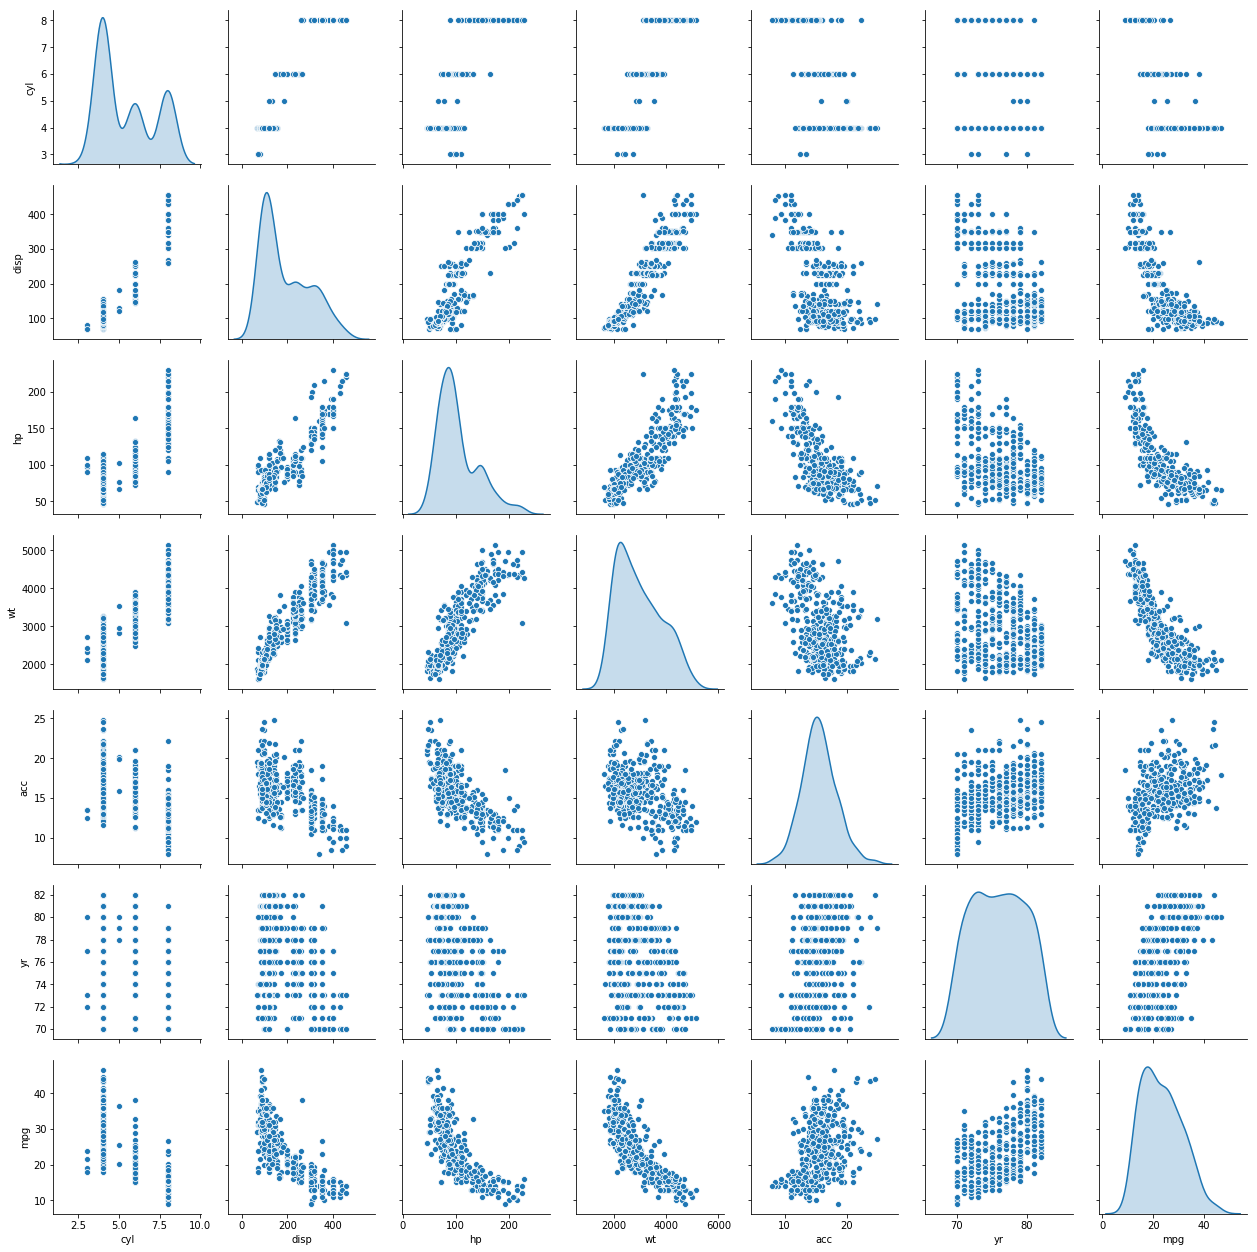

In [10]:
sns.pairplot(mpg_df.iloc[:, 0:9], diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

### 3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

In [11]:
#Standardize the data

#Since the dimensions of the data are not really known to us, 
#it would be wise to standardize the data using z scores before we go for any clustering methods. 
#You can use zscore function to do this

numeric_cols = mpg_df.drop('car name', axis=1)

class_col  = mpg_df.pop("car name")

numeric_cols = numeric_cols.apply(zscore)

mpg_df_attr_z = numeric_cols.join(class_col)   # Recreating mpg_df by combining numerical columns with car names

mpg_df_attr_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,chevrolet chevelle malibu
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,buick skylark 320
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,plymouth satellite
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,amc rebel sst
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,ford torino


In [12]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905671e+07
3,5,1.376961e+07


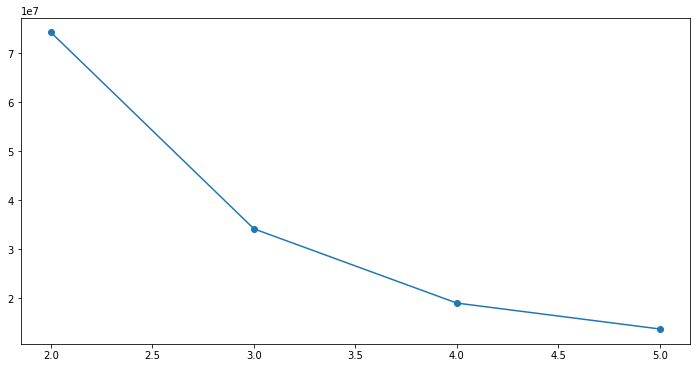

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [14]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

### K-Mean Clustering with 3 Clusters

In [15]:
#K-Mean Clustering with 3 Clusters

cluster = KMeans( n_clusters = 3, random_state = 2354 )
mpg_df_attr_z = mpg_df_attr_z.loc[:, 'cyl':'mpg']
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [16]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51412926,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [ 0.35772459,  0.24687769, -0.04275477,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [17]:
list(mpg_df_attr_z) 

['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'GROUP']

In [18]:
centroid_df = pd.DataFrame(centroids, columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'] )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.309923,0.753947
1,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-1.158713
2,0.357725,0.246878,-0.042755,0.308299,0.285786,-0.002721,-0.479054


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004E0F518>,
      dtype=object)

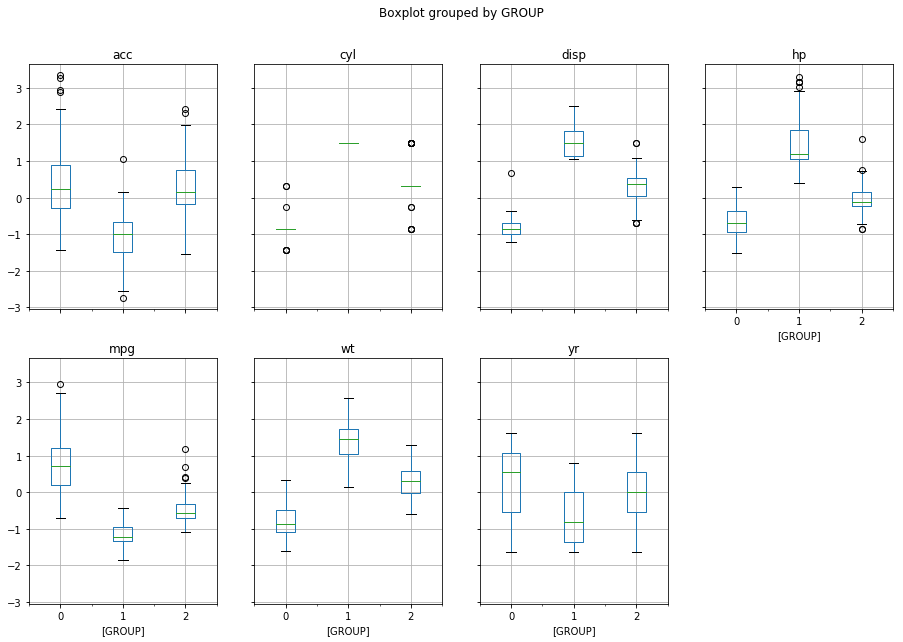

In [19]:
mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [20]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EA62B38>,
      dtype=object)

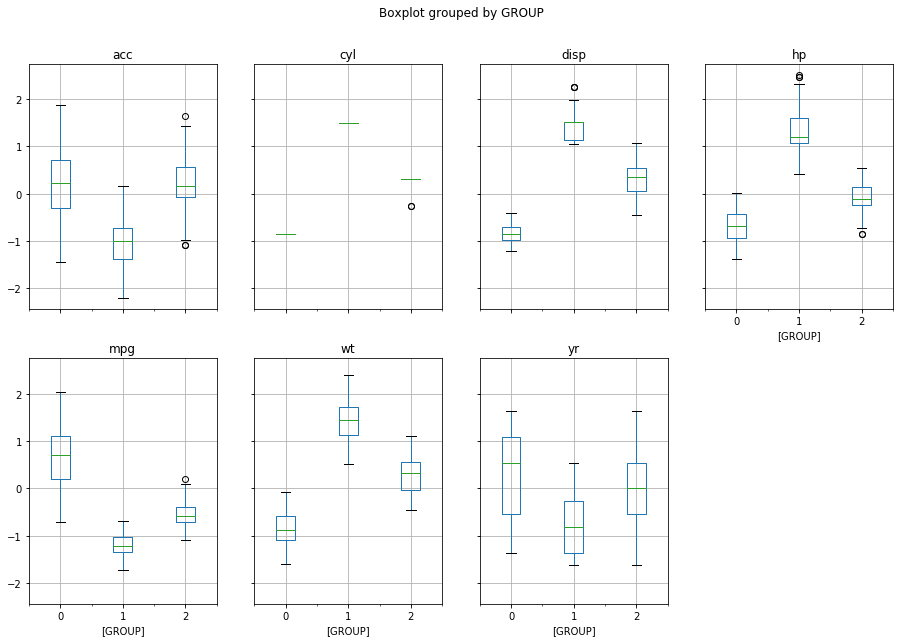

In [21]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


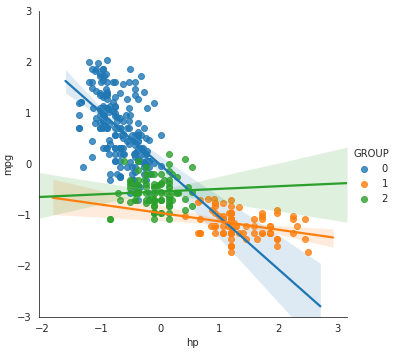

In [22]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### K-Mean Clustering with 4 Clusters



In [23]:
#K-Mean Clustering with 4 Clusters

cluster = KMeans( n_clusters = 4, random_state = 2354 )
mpg_df_attr_z = mpg_df_attr_z.loc[:, 'cyl':'mpg']
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [24]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.42443037,  0.30530323, -0.03775766,  0.33776539,  0.29367006,
         0.03298635, -0.49682681],
       [-0.82450284, -0.78042723, -0.74238037, -0.76525521,  0.38447752,
         1.12432606,  1.19411648],
       [ 1.49819126,  1.50392292,  1.52168282,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.86209143, -0.80905811, -0.56076487, -0.76253463,  0.32055871,
        -0.61862263,  0.21628669]])

In [25]:
centroid_df = pd.DataFrame(centroids, columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'] )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,0.424430,0.305303,-0.037758,0.337765,0.293670,0.032986,-0.496827
1,-0.824503,-0.780427,-0.742380,-0.765255,0.384478,1.124326,1.194116
2,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
3,-0.862091,-0.809058,-0.560765,-0.762535,0.320559,-0.618623,0.216287


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010389588>,
      dtype=object)

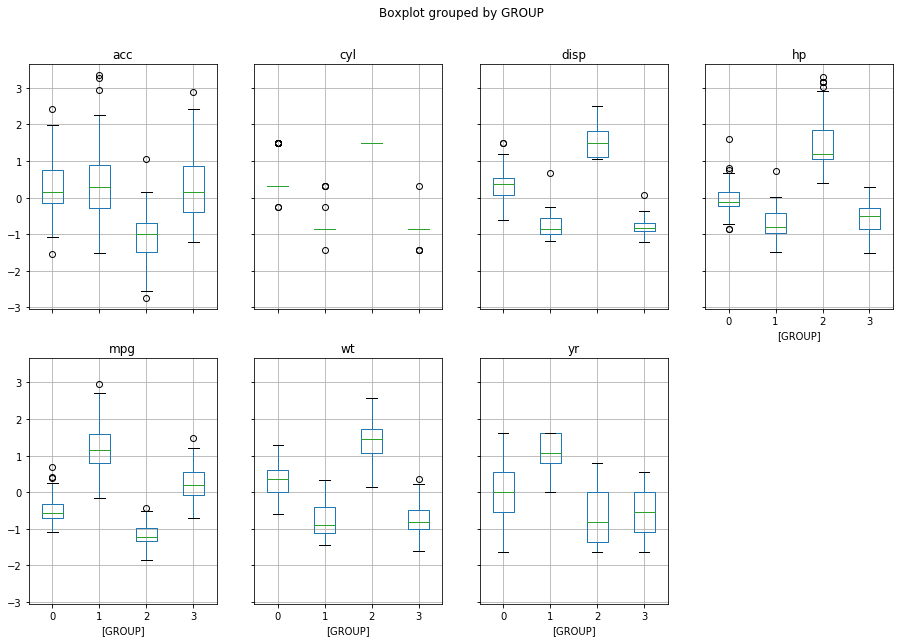

In [26]:
mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [27]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EB30400>,
      dtype=object)

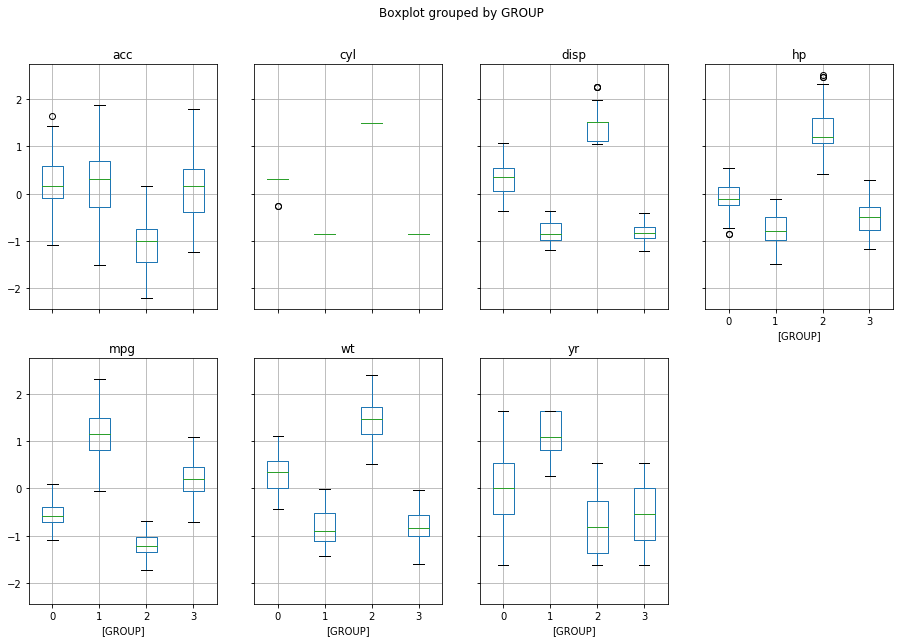

In [28]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


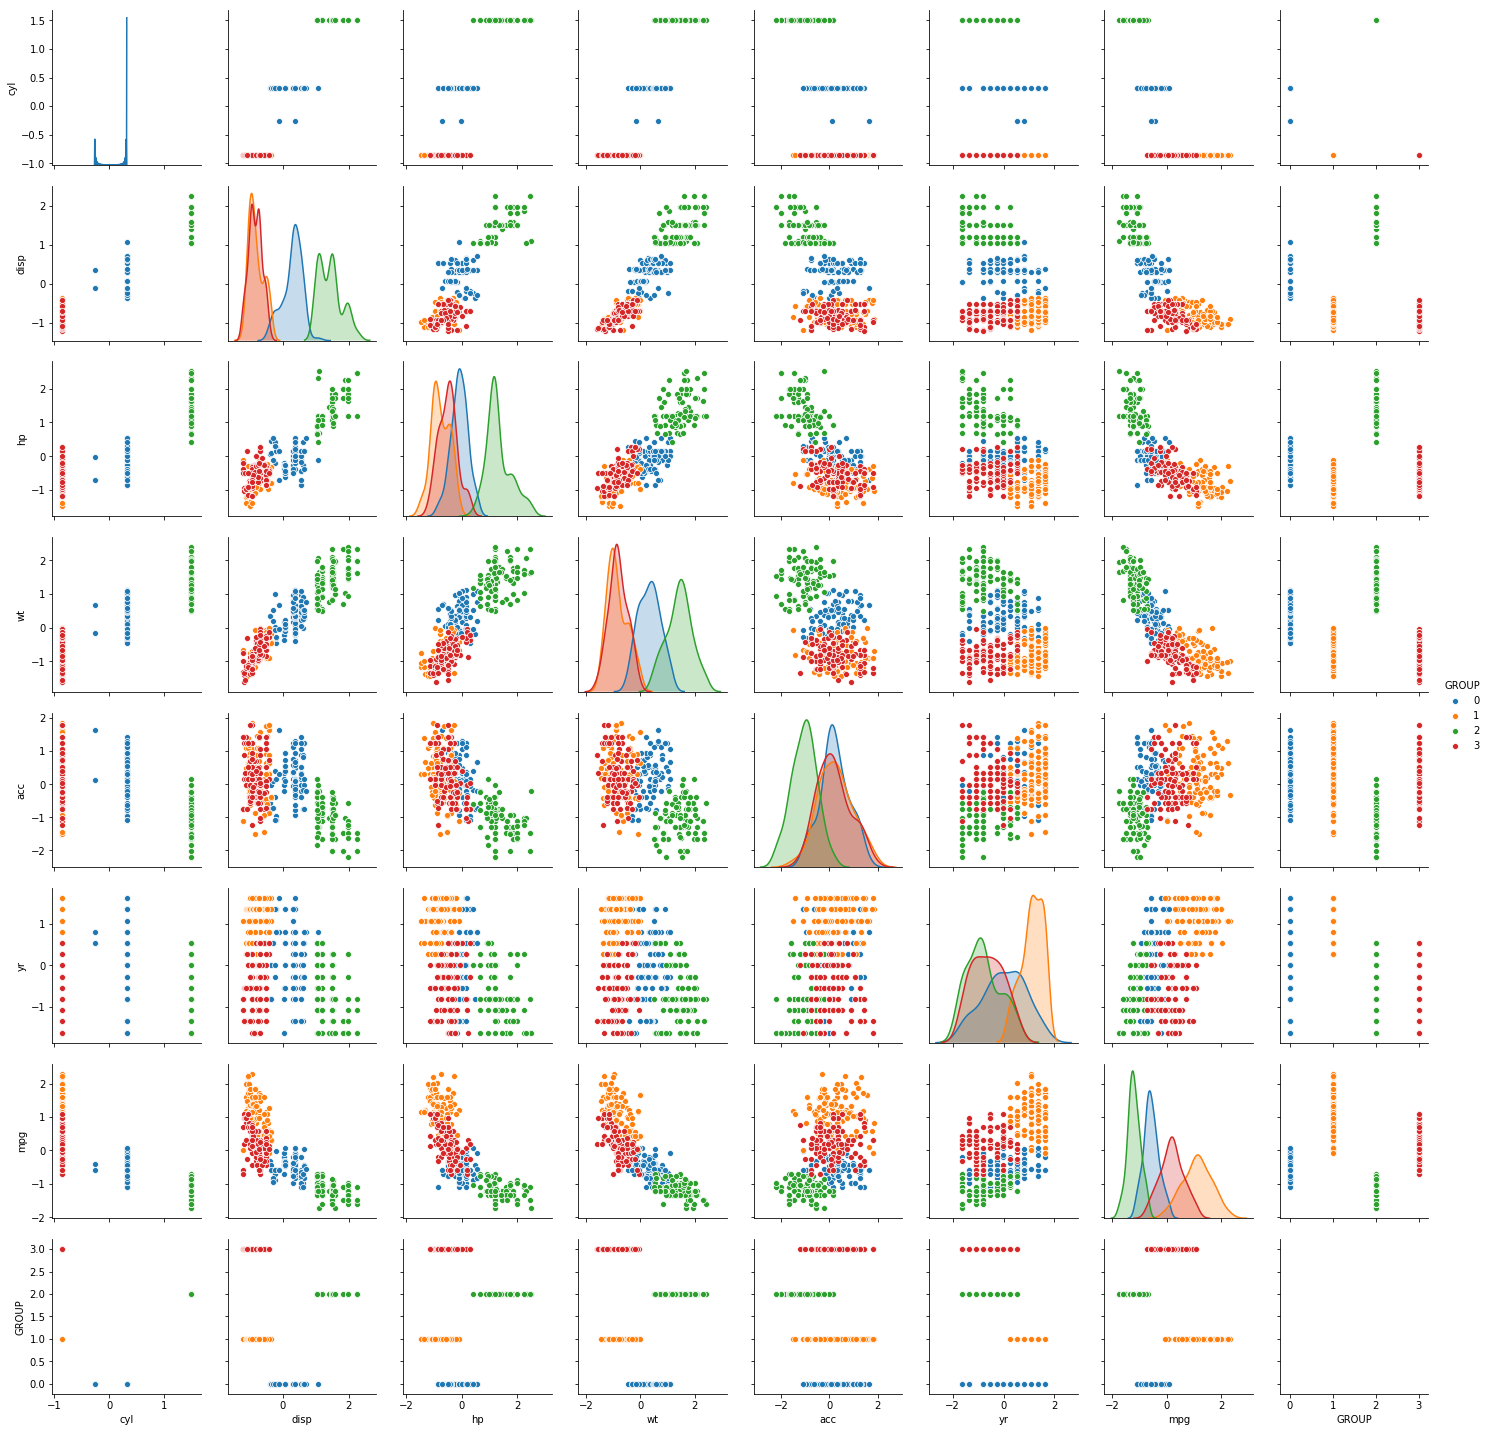

In [29]:
sns.pairplot(concat_data, diag_kind='kde',hue='GROUP') 

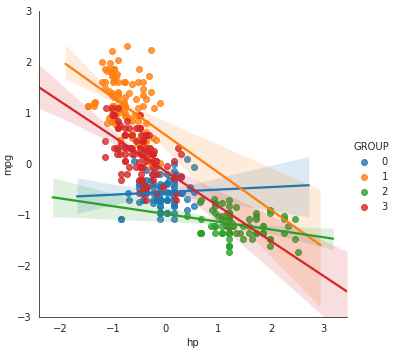

In [30]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [43]:
# Let us break the data into largecar and smallcar segments

largecar = concat_data[concat_data['GROUP']==1]
smallcar = concat_data[concat_data['GROUP']==0]
sedancar = concat_data[concat_data['GROUP']==2]
minicar  = concat_data[concat_data['GROUP']==3]

In [44]:
# Large Car
largecar.shape

(111, 8)

In [45]:
# Small Car
smallcar.shape

(91, 8)

In [46]:
# sedan Car
sedancar.shape

(94, 8)

In [47]:
# minicar Car
minicar.shape

(102, 8)

### 4.Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [ ]:
# Linear Model - independent variables : 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'
# Linear Model - Target Variables : 'mpg'

In [ ]:
# Let's see some analysis between mpg VS other fields ('hp', 'wt', 'disp')

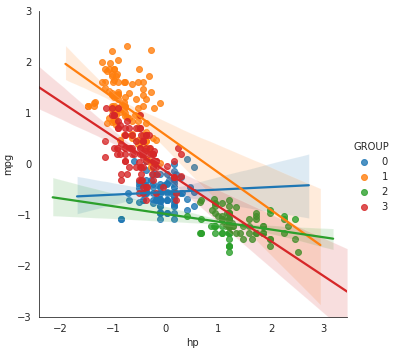

In [36]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

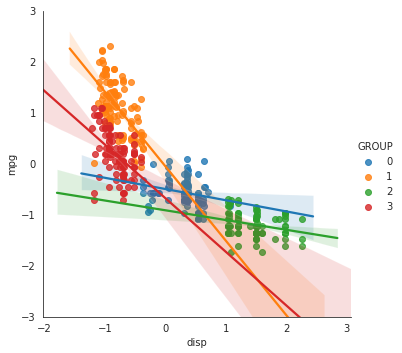

In [37]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

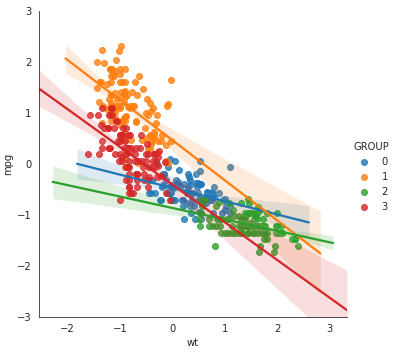

In [38]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### Linear Regression Model - Large Car Cluster (Group)

In [56]:
from sklearn import svm
# Let use SVM (Support Vector Machine) Linear kernel model
clr = svm.SVR(kernel='linear')


# Get independent variable in X
X = largecar.drop(["mpg","GROUP"], axis=1)
# Get Target variable in y
y = largecar["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


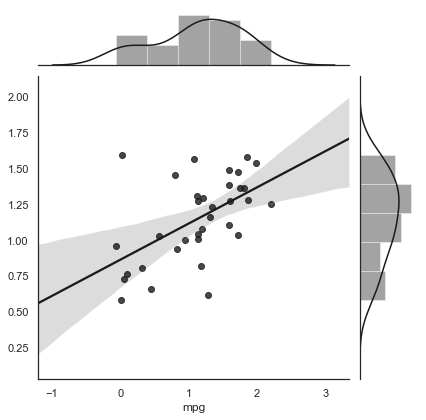

In [58]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [75]:
print("Large Car - Linear Model Co-Efficient :\n {0}".format(clr.coef_))

Large Car - Linear Model Co-Efficient :
 [[-2.22044605e-16 -7.07124090e-01 -4.56220499e-01 -1.39561959e-01
  -1.39683897e-01  9.33583701e-02]]


### Linear Regression Model - Small Car Cluster (Group)

In [67]:
# Let use SVM (Support Vector Machine) Linear kernel model
clr = svm.SVR(kernel='linear')

# Get independent variable in X
X = smallcar.drop(["mpg","GROUP"], axis=1)
# Get Target variable in y
y = smallcar["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


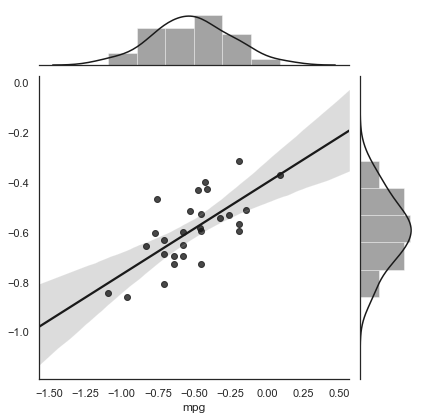

In [61]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [74]:
print("Small Car - Linear Model Co-Efficient :\n {0}".format(clr.coef_))

Small Car - Linear Model Co-Efficient :
 [[-2.22044605e-16 -7.07124090e-01 -4.56220499e-01 -1.39561959e-01
  -1.39683897e-01  9.33583701e-02]]


### Linear Regression Model - Sedan Car Cluster (Group)

In [64]:
# Let use SVM (Support Vector Machine) Linear kernel model
clr = svm.SVR(kernel='linear')

# Get independent variable in X
X = sedancar.drop(["mpg","GROUP"], axis=1)
# Get Target variable in y
y = sedancar["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


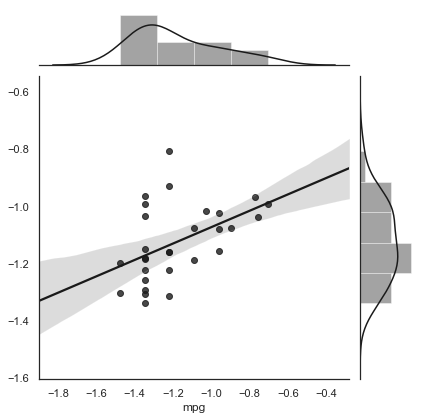

In [66]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [73]:
print("Sedan Car - Linear Model Co-Efficient :\n {0}".format(clr.coef_))

Sedan Car - Linear Model Co-Efficient :
 [[-2.22044605e-16 -7.07124090e-01 -4.56220499e-01 -1.39561959e-01
  -1.39683897e-01  9.33583701e-02]]


### Linear Regression Model - Mini Car Cluster (Group)

In [69]:
# Let use SVM (Support Vector Machine) Linear kernel model
clr = svm.SVR(kernel='linear')

# Get independent variable in X
X = minicar.drop(["mpg","GROUP"], axis=1)
# Get Target variable in y
y = minicar["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


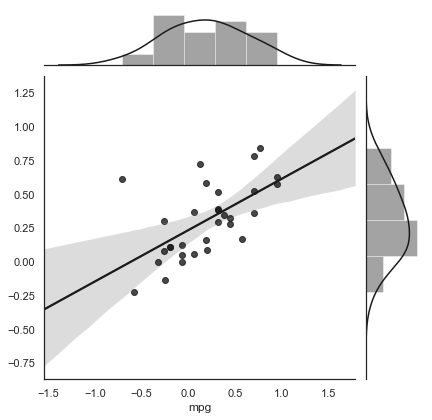

In [71]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [72]:
print("Mini Car - Linear Model Co-Efficient :\n {0}".format(clr.coef_))

Mini Car - Linear Model Co-Efficient :
 [[-2.22044605e-16 -7.07124090e-01 -4.56220499e-01 -1.39561959e-01
  -1.39683897e-01  9.33583701e-02]]
